In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from statannotations.Annotator import Annotator

In [27]:
train_values_df = pd.read_csv('./results/kennedy-data-train_values_5_epochs.csv', index_col=0)
train_values_df.head()

,text_id,label_0,label_1,label_2,epoch_no,text,label,pred
0,23191,0.378584,0.291954,0.329462,1,@RealEstate4SoMD @KarenBice @Franklin_Graham @...,1,0
1,46255,0.367900,0.284932,0.347168,1,AMERICANS MUST UNITE TO STOP ILLEGAL SCUMBAG B...,2,0
2,44818,0.330323,0.298927,0.370750,1,@ih8myfriends Go look for the chromosomes you ...,2,2
3,27323,0.322709,0.331134,0.346157,1,"Go ahead faggot try and resist me, it's imposs...",2,2
4,5945,0.273838,0.363074,0.363088,1,The results are in. When it comes to wanting t...,1,2


In [28]:
train_df = pd.read_csv('../../data/kennedy/kennedy_train.csv', index_col=0)
train_df.head()

,comment_id,annotator_id,text,hate_speech_score,hatespeech,label,label_vector,message
0,47777,10873,Yes indeed. She sort of reminds me of the elde...,-3.9,0.0,0.0,0,Yes indeed. She sort of reminds me of the elde...
1,47777,9099,Yes indeed. She sort of reminds me of the elde...,-3.9,0.0,0.0,0,Yes indeed. She sort of reminds me of the elde...
2,47777,7391,Yes indeed. She sort of reminds me of the elde...,-3.9,0.0,0.0,0,Yes indeed. She sort of reminds me of the elde...
3,47777,10560,Yes indeed. She sort of reminds me of the elde...,-3.9,0.0,0.0,0,Yes indeed. She sort of reminds me of the elde...
4,47777,6008,Yes indeed. She sort of reminds me of the elde...,-3.9,0.0,0.0,0,Yes indeed. She sort of reminds me of the elde...


In [29]:
len(train_df['comment_id'].unique())

31652

In [30]:
len(train_df['annotator_id'].unique())

7912

In [31]:
def get_agreement_score(x):
    mode_result = x.mode()
    mode_count = (x == mode_result.iloc[0]).sum()
    ln = len(x)
    return mode_count/ln

In [32]:
text_df = train_df.groupby('comment_id', as_index=False).agg({'label': get_agreement_score})
text_df.columns = ['comment_id', 'annotator_agreement_factor']
text_df.head()

,comment_id,annotator_agreement_factor
0,1,1.000000
1,2,0.666667
2,3,0.666667
3,4,0.500000
4,5,1.000000


In [33]:
text_df[text_df['comment_id']==4777]

,comment_id,annotator_agreement_factor
3080,4777,0.5


<Axes: >

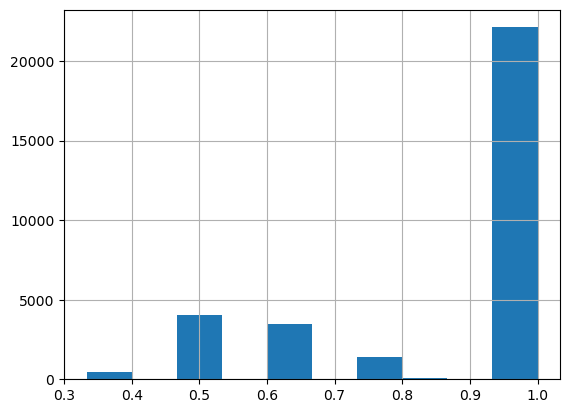

In [34]:
text_df.annotator_agreement_factor.hist()

In [37]:
train_values_df = train_values_df.merge(text_df[['comment_id', 'annotator_agreement_factor']], right_on='comment_id', left_on='text_id')
train_values_df.head()

,text_id,label_0,label_1,label_2,epoch_no,text,label,pred,comment_id,annotator_agreement_factor
0,23191,0.378584,0.291954,0.329462,1,@RealEstate4SoMD @KarenBice @Franklin_Graham @...,1,0,23191,1.0
1,23191,0.023891,0.223320,0.752789,2,@RealEstate4SoMD @KarenBice @Franklin_Graham @...,1,2,23191,1.0
2,23191,0.020952,0.584203,0.394845,3,@RealEstate4SoMD @KarenBice @Franklin_Graham @...,1,1,23191,1.0
3,23191,0.017527,0.852212,0.130261,4,@RealEstate4SoMD @KarenBice @Franklin_Graham @...,1,1,23191,1.0
4,23191,0.008242,0.798938,0.192820,5,@RealEstate4SoMD @KarenBice @Franklin_Graham @...,1,1,23191,1.0


In [39]:
train_values_df[train_values_df['comment_id']==4777]

,text_id,label_0,label_1,label_2,epoch_no,text,label,pred,comment_id,annotator_agreement_factor
90110,4777,0.100072,0.261293,0.638634,1,"I am for exterminating Muslim, clitorises won'...",2,2,4777,0.5
90111,4777,0.003781,0.126257,0.869961,2,"I am for exterminating Muslim, clitorises won'...",2,2,4777,0.5
90112,4777,0.003306,0.033860,0.962834,3,"I am for exterminating Muslim, clitorises won'...",2,2,4777,0.5
90113,4777,0.000850,0.026673,0.972477,4,"I am for exterminating Muslim, clitorises won'...",2,2,4777,0.5
90114,4777,0.002807,0.026270,0.970923,5,"I am for exterminating Muslim, clitorises won'...",2,2,4777,0.5


In [40]:
def get_confidence(label, label_0_mean, label_1_mean, label_2_mean):
    if label == 0:
        return label_0_mean
    elif label == 1:
        return label_1_mean
    else: return label_2_mean
    
def get_variability(label, label_0_std, label_1_std, label_2_std):
    if label == 0:
        return label_0_std
    elif label == 1:
        return label_1_std
    else: return label_2_std

def get_correctness(label, label_0_last, label_1_last, label_2_last):
    if label == 0:
        return label_0_last
    elif label == 1:
        return label_1_last
    else: return label_2_last

In [43]:
metrics = ['mean', 'std', 'last']
def build_cartography_df(train_values_df):
    agg_df = train_values_df.sort_values(['epoch_no']).groupby('text_id', as_index=False).agg({'text':'first', 'label_0': metrics, 'label_1': metrics, 'label_2': metrics, 'label': 'first', 'pred': 'last', 'annotator_agreement_factor': 'first'})
    agg_df.columns = ['text_id', 'text', 'label_0_mean', 'label_0_std', 'label_0_last', 'label_1_mean', 'label_1_std', 'label_1_last', 'label_2_mean', 'label_2_std', 'label_2_last', 'label', 'pred', 'annotator_agreement_factor']
    
    agg_df['confidence'] = agg_df.apply(lambda row: get_confidence(row.label, row.label_0_mean, row.label_1_mean, row.label_2_mean), axis=1)
    agg_df['variability'] = agg_df.apply(lambda row: get_variability(row.label, row.label_0_std, row.label_1_std, row.label_2_std), axis=1)
    agg_df['correctness'] = agg_df.apply(lambda row: get_correctness(row.label, row.label_0_last, row.label_1_last, row.label_2_last), axis=1)
    agg_df['is_correct'] = np.where((agg_df['label'] == agg_df['pred']), True, False)
    
    return agg_df

In [44]:
cartography_df = build_cartography_df(train_values_df)
cartography_df.head()

,text_id,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label_2_mean,label_2_std,label_2_last,label,pred,annotator_agreement_factor,confidence,variability,correctness,is_correct
0,1,White people are trash.,0.023513,0.026823,0.005023,0.404921,0.194332,0.333946,0.571566,0.187186,0.661030,1,2,1.000000,0.404921,0.194332,0.333946,False
1,3,"I'm not saying you said that, I'm just saying ...",0.935748,0.099976,0.996536,0.059706,0.093207,0.003132,0.004547,0.006769,0.000332,0,0,0.666667,0.935748,0.099976,0.996536,True
2,5,Fabrice Fabrice is ostensibly black or black/l...,0.964934,0.044694,0.994869,0.032743,0.042628,0.004476,0.002323,0.002278,0.000655,0,0,1.000000,0.964934,0.044694,0.994869,True
3,8,Guranteed at least one of these guys has raped...,0.201035,0.240051,0.028061,0.528604,0.356410,0.915830,0.270361,0.370314,0.056109,2,1,1.000000,0.270361,0.370314,0.056109,False
4,11,"eat my fuck, bitch",0.018897,0.022478,0.003771,0.240425,0.151799,0.235622,0.740679,0.167098,0.760607,2,2,0.500000,0.740679,0.167098,0.760607,True


In [45]:
cartography_df[cartography_df['text_id']==3]

,text_id,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label_2_mean,label_2_std,label_2_last,label,pred,annotator_agreement_factor,confidence,variability,correctness,is_correct
1,3,"I'm not saying you said that, I'm just saying ...",0.935748,0.099976,0.996536,0.059706,0.093207,0.003132,0.004547,0.006769,0.000332,0,0,0.666667,0.935748,0.099976,0.996536,True


### Useless post this

In [46]:
# cartography_df = pd.read_csv('./results/measuring-hate-speech-uc-berk-data-cartography.csv', index_col=0)
# cartography_df['agreement_factor'] = cartography_df['annotator_agreement_factor']
# cartography_df['agreement_factor'] = cartography_df['agreement_factor'].apply(lambda x: 0.6 if x == 0.4 else x)
# cartography_df.head()

In [47]:
def round_agree_factor(agr_factor):
    if agr_factor <= 0.6:
        return 0.6
    elif agr_factor <= 0.8:
        return 0.8
    return 1.0

cartography_df['agreement_factor_rd'] = cartography_df['annotator_agreement_factor'].apply(lambda x: round_agree_factor(x))
cartography_df.head()

,text_id,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label_2_mean,label_2_std,label_2_last,label,pred,annotator_agreement_factor,confidence,variability,correctness,is_correct,agreement_factor_rd
0,1,White people are trash.,0.023513,0.026823,0.005023,0.404921,0.194332,0.333946,0.571566,0.187186,0.661030,1,2,1.000000,0.404921,0.194332,0.333946,False,1.0
1,3,"I'm not saying you said that, I'm just saying ...",0.935748,0.099976,0.996536,0.059706,0.093207,0.003132,0.004547,0.006769,0.000332,0,0,0.666667,0.935748,0.099976,0.996536,True,0.8
2,5,Fabrice Fabrice is ostensibly black or black/l...,0.964934,0.044694,0.994869,0.032743,0.042628,0.004476,0.002323,0.002278,0.000655,0,0,1.000000,0.964934,0.044694,0.994869,True,1.0
3,8,Guranteed at least one of these guys has raped...,0.201035,0.240051,0.028061,0.528604,0.356410,0.915830,0.270361,0.370314,0.056109,2,1,1.000000,0.270361,0.370314,0.056109,False,1.0
4,11,"eat my fuck, bitch",0.018897,0.022478,0.003771,0.240425,0.151799,0.235622,0.740679,0.167098,0.760607,2,2,0.500000,0.740679,0.167098,0.760607,True,0.6


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

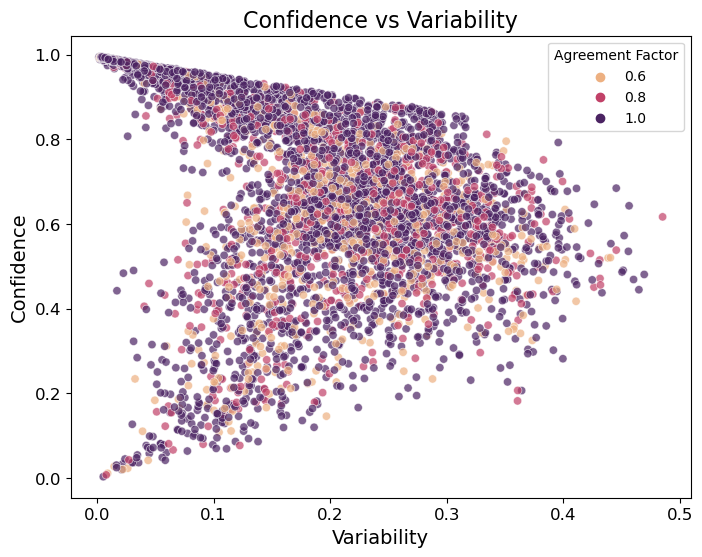

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df.sample(frac=0.2), x="variability", y="confidence", hue='agreement_factor_rd', palette='flare', alpha=0.7)

plt.title("Confidence vs Variability", fontsize=16)
plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.legend(title='Agreement Factor')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.savefig("./plots/conf_vs_var_color_agreement_factor.png", dpi=600, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.6 vs. 0.8: Mann-Whitney-Wilcoxon test two-sided, P_val:1.321e-12 U_stat=6.563e+06
0.8 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:4.221e-138 U_stat=2.592e+07
0.6 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.277e-220 U_stat=2.181e+07


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2'),
  Text(0, 1.4000000000000001, '1.4'),
  Text(0, 1.6, '1.6')])

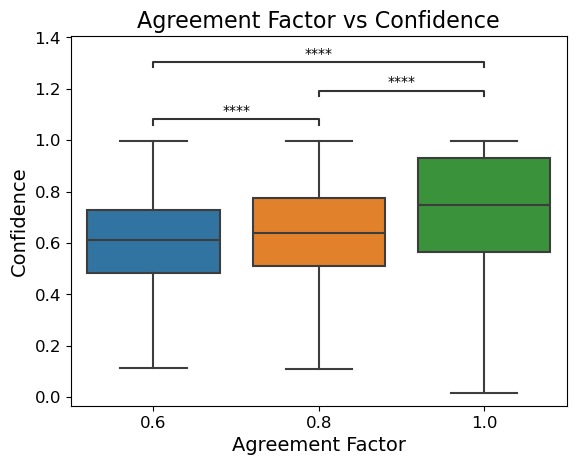

In [50]:
# sns.boxplot(data=cartography_df, x="agreement_factor", y="confidence")
# plt.title("Agreement Factor vs Confidence", fontsize=16)
# plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
# plt.gca().set_xlabel('Agreement Factor', fontsize=14)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.savefig("agr_factor_vs_conf.png", dpi=600, bbox_inches='tight')

ax = sns.boxplot(data=cartography_df, x="agreement_factor_rd", y="confidence", showfliers=False)

pairs=[(0.6, 0.8), (0.8, 1.0), (0.6, 1.0)]

annotator = Annotator(ax, pairs, data=cartography_df, x="agreement_factor_rd", y="confidence")
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()

plt.title("Agreement Factor vs Confidence", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.savefig("./plots/agr_factor_vs_conf.png", dpi=600, bbox_inches='tight')

In [51]:
cartography_df['label_text'] = cartography_df['label'].map({0: 'supportive', 1: 'neutral', 2: 'hate speech'})

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.6_supportive vs. 1.0_supportive: Mann-Whitney-Wilcoxon test two-sided, P_val:1.455e-90 U_stat=1.781e+06
0.6_neutral vs. 1.0_neutral: Mann-Whitney-Wilcoxon test two-sided, P_val:6.807e-01 U_stat=3.599e+06
0.6_hate speech vs. 1.0_hate speech: Mann-Whitney-Wilcoxon test two-sided, P_val:1.394e-02 U_stat=2.429e+06


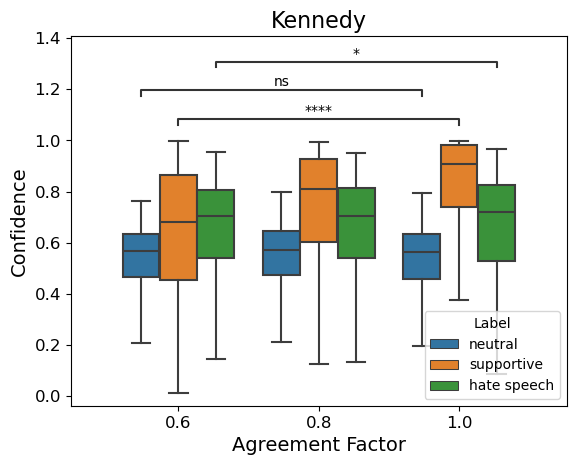

In [52]:
ax = sns.boxplot(data=cartography_df, x="agreement_factor_rd", y="confidence", hue='label_text', showfliers=False, palette='tab10')

pairs=[ ((0.6, 'supportive'), (1.0, 'supportive')), ((0.6, 'neutral'), (1.0, 'neutral')), ((0.6, 'hate speech'), (1.0, 'hate speech'))]


annotator = Annotator(ax, pairs, data=cartography_df, x="agreement_factor_rd", y="confidence", hue='label_text')
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()

plt.title("Kennedy", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title = 'Label', loc='lower right')
# plt.savefig("./plots/agr_factor_vs_conf_hue.png", dpi=600, bbox_inches='tight')

<Axes: xlabel='label', ylabel='Count'>

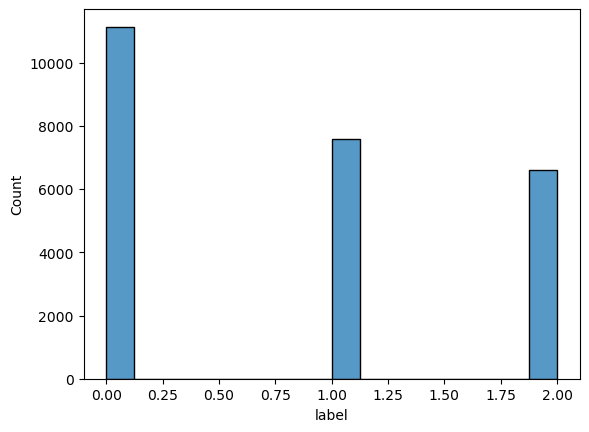

In [53]:
sns.histplot(cartography_df, x='label')

In [8]:
cartography_df['label'].value_counts()

0    15727
1    10562
2     9319
Name: label, dtype: int64

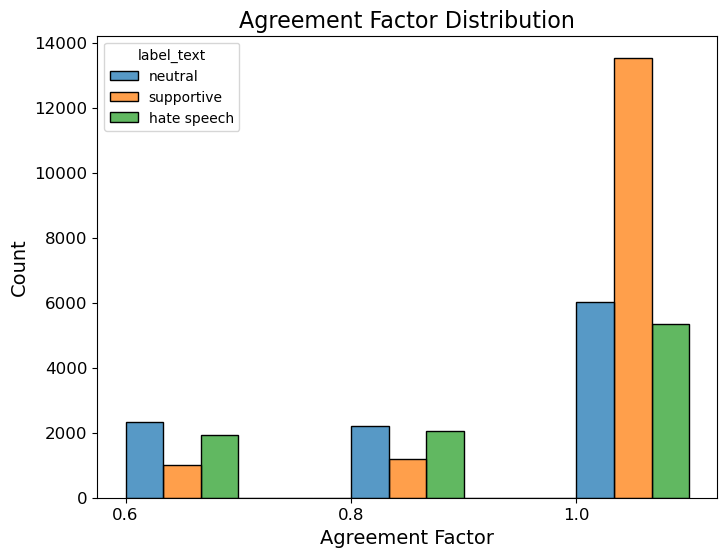

In [42]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=cartography_df, x="agreement_factor_rd", hue='label_text', palette='tab10', multiple='dodge', binwidth=0.1)

plt.title("Agreement Factor Distribution", fontsize=16)
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks([0.6, 0.8, 1.0], fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/agr_factor_hist.png", dpi=600, bbox_inches='tight')

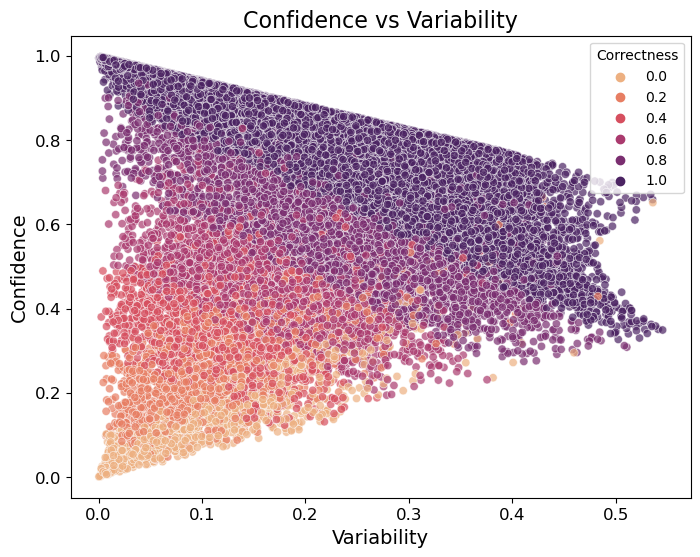

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df, x="variability", y="confidence", hue='correctness', palette='flare', alpha=0.7)

plt.title("Confidence vs Variability", fontsize=16)
plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Correctness', loc='upper right')
plt.savefig("./plots/conf_vs_var_color_correctness.png", dpi=600, bbox_inches='tight')

In [8]:
def get_text_label(label):
    if label == 1:
        return 'Neutral'
    elif label == 2:
        return 'Hate Speech'
    else:
        return 'Supportive'
cartography_df['text_label'] = cartography_df['label'].apply(lambda x: get_text_label(x))

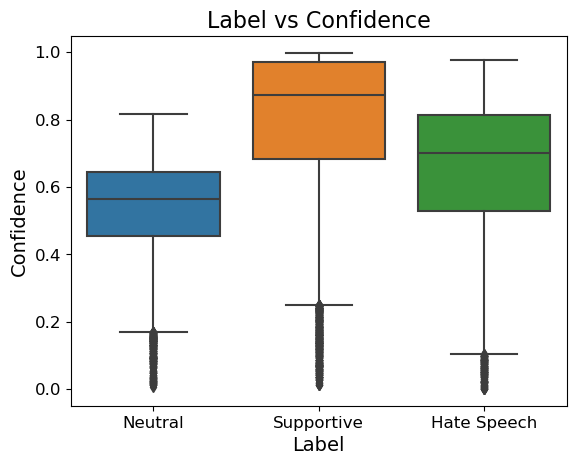

In [9]:
sns.boxplot(data=cartography_df, x="text_label", y="confidence")
plt.title("Label vs Confidence", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Label', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/label_vs_conf.png", dpi=600, bbox_inches='tight')

In [19]:
from scipy.stats import pearsonr

pearsonr(cartography_df['confidence'], cartography_df['agreement_factor_rd'])

PearsonRResult(statistic=0.200176008169689, pvalue=1.355015e-318)